<!-- dom:TITLE: PHY321: Classical Mechanics 1 -->
# PHY321: Classical Mechanics 1
<!-- dom:AUTHOR: Solution Homework 6, due Monday  February 24 -->
<!-- Author: -->  
**Solution Homework 6, due Monday  February 24**

Date: **Feb 25, 2021**

### Exercise 2 (10 pt), Conservative forces

Which of the following force are conservative?  All three forces depend only on $\boldsymbol{r}$ and satisfy the first condition for being conservative.
* 2a (2pt) $\boldsymbol{F}=k(x\boldsymbol{i}+2y\boldsymbol{j}+3z\boldsymbol{k})$ where $k$ is a constant.

The **curl** is zero and the force is conservative.  The potential energy is upon integration $V(x)=-k(1/2x^2+y^2+3/2z^2)$. Taking the derivative shows that this is indeed the case since it gives back the force.
* 2b (2pt) $\boldsymbol{F}=y\boldsymbol{i}+x\boldsymbol{j}+0\boldsymbol{k}$. 

This force is also conservative since it depends only on the coordinates and its curl is zero. To find the potential energy, since the integral is path independent, we can choose to integrate along any direction. The simplest is start from $x=0$ as origin and follow a path along the $x$-axis (which gives zero) and then parallel to the $y$-axis, which results in $V(x,y) = -xy$. Taking the derivative with respect to $x$ and $y$ gives us back the expression for the force.

* 2c (2pt) $\boldsymbol{F}=k(-y\boldsymbol{i}+x\boldsymbol{j}+0\boldsymbol{k})$ where $k$ is a constant.

Here the **curl** is $(0,0,2)$ and the force is not conservative.

* 2d (4pt) For those which are conservative, find the corresponding potential energy $V$ and verify that direct differentiation that $\boldsymbol{F}=-\boldsymbol{\nabla} V$.

See the answers to each exercise above.

### Exercise 3 (10 pt), The Lennard-Jones potential

[The Lennard-Jones potential](https://en.wikipedia.org/wiki/Lennard-Jones_potential) is often used to describe
the interaction between two atoms or ions or molecules. If you end up doing materals science and molecular dynamics calculations, it is very likely that you will encounter this potential model.
The expression for the potential energy is

$$
V(r) = V_0\left((\frac{a}{r})^{12}-(\frac{b}{r})^{6}\right),
$$

where $V_0$, $a$ and $b$ are constants and the potential depends only on the relative distance between two objects
$i$ and $j$, that is $r=\vert\vert\boldsymbol{r}_i-\boldsymbol{r}_j\vert\vert=\sqrt{(x_i-x_j)^2+(y_i-y_j)^2+(z_i-z_j)^2}$.

* 3a (3pt) Sketch/plot the potential (choose some values for the constants in doing so).

The following Python code plots the potential

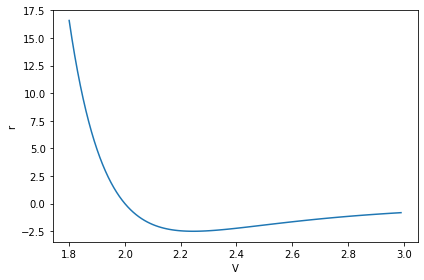

In [2]:
%matplotlib inline

# Common imports
import numpy as np
from math import *
import matplotlib.pyplot as plt

Deltar = 0.01
#set up arrays
rinitial = 1.8
rfinal = 3.
n = ceil((rfinal-rinitial)/Deltar)
r = np.zeros(n)
for i in range(n):
    r[i] = rinitial+i*Deltar
V = np.zeros(n)
# Initial conditions as compact 2-dimensional arrays
a = 2.0
b = 2.0
V0 = 10.0
V = V0*((a/r)**(12)-(b/r)**6)
# Plot position as function of time    
fig, ax = plt.subplots()
#ax.set_xlim(0, tfinal)
ax.set_ylabel('r')
ax.set_xlabel('V')
ax.plot(r, V)
fig.tight_layout()
plt.show()

* 3b (3pt) Find and classify the equilibrium points.

Here there is  only one equilibrium point when we take the derivative of the potential with respect to the relative distance.

The derivative with respect to $r$, the relative distance, is

$$
\frac{dV}{dr} = -6V_0\left(2\frac{a^{12}}{r^{13}}-\frac{b^6}{r^7}\right),
$$

and this is zero when

$$
r = 2^{1/6}\frac{a^2}{b}.
$$

If we choose $a=2$ and $b=2$ then $r=2\times 2^{1/6}$. Since the second derivative is positive for all $r$ for our choices of $a$ and $b$  (convince yourself about  this), then this value of $r$ has to correspond to a minimum of the potential. This agrees with our graph from the figure above (run the code to produce the figure). 

* 3c (4pt) What is the force acting on one of the objects (an atom for example) from the other object? Is this a conservative force?

From the previous exercise we have

$$
\frac{dV}{dr} = -6V_0\left(2\frac{a^{12}}{r^{13}}-\frac{b^6}{r^7}\right).
$$

We need the gradient and since the force on particle $i$ is given by $\boldsymbol{F}_i=\boldsymbol{\nabla}_i V(\boldsymbol{r}_i-\boldsymbol{r}_j)$, we obtain

$$
\boldsymbol{F}_i=6V_0\left(2(\frac{a}{\vert\vert\boldsymbol{r}_i-\boldsymbol{r}_j\vert\vert})^{12}-(\frac{b}{\vert\vert\boldsymbol{r}_i-\boldsymbol{r}_j\vert\vert})^6\right)\frac{\boldsymbol{r}_i-\boldsymbol{r}_j}{\vert\vert\boldsymbol{r}_i-\boldsymbol{r}_j\vert\vert^2}.
$$

Here $r = \vert\vert \boldsymbol{r}_i-\boldsymbol{r}_j\vert \vert$.
If we have more than two particles, we need to sum over all other particles $j$. We have thus to introduce a sum over all particles $N$. 
The force on particle $i$ at position $\boldsymbol{r}_i$ from all particles  $j$ at their positions $\boldsymbol{r}_j$ results in the equation of motion (note that we have divided by the mass $m$ here)

$$
\boldsymbol{a}_i=\frac{d^2\boldsymbol{r}_i}{dt^2} = \frac{6V_0}{m} \sum_{j \neq i}^{N}\left(2(\frac{a}{\vert\vert\boldsymbol{r}_i-\boldsymbol{r}_j\vert\vert})^{12}-(\frac{b}{\vert\vert\boldsymbol{r}_i-\boldsymbol{r}_j\vert\vert})^6\right)\frac{\boldsymbol{r}_i-\boldsymbol{r}_j}{\vert\vert\boldsymbol{r}_i-\boldsymbol{r}_j\vert\vert^2}.
$$

This is also a conservative force, with zero **curl** as well. 

### Exercise 4 (10 pt), particle in a new potential

Relevant reading here is Taylor chapter 5 and the lecture notes on oscilaltions. In particular, you will find useful  sections 5.1, 5.2, 5.4-5.6. They contain all material needed to solve this exercise.

Consider a particle of mass $m$ moving in a one-dimensional potential,

$$
V(x)=-\alpha\frac{x^2}{2}+\beta\frac{x^4}{4}.
$$

* 4a (3pt) Plot the potential and discuss eventual equilibrium points. Is this a conservative force?

The following Python code gives a plot of potential

1.2727922061357855


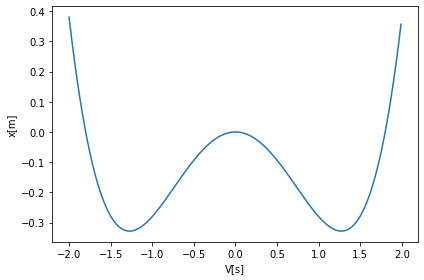

In [3]:
# Common imports
import numpy as np
from math import *
import matplotlib.pyplot as plt

Deltax = 0.01
#set up arrays
xinitial = -2.0
xfinal = 2.0 
n = ceil((xfinal-xinitial)/Deltax)
x = np.zeros(n)
for i in range(n):
    x[i] = xinitial+i*Deltax
V = np.zeros(n)
# Initial conditions as compact 2-dimensional arrays
alpha = 0.81
beta = 0.5
print(sqrt(alpha/beta))
V = -alpha*x*x*0.5 + beta*(x**4)*0.25
# Plot position as function of time    
fig, ax = plt.subplots()
#ax.set_xlim(0, tfinal)
ax.set_ylabel('x[m]')
ax.set_xlabel('V[s]')
ax.plot(x, V)
fig.tight_layout()
plt.show()

Here we have chosen $\alpha=0.81$ and $\beta=0.5$. Taking the derivative of $V$ with respect to $x$ gives two minima (and it is easy to see here that the second derivative is positive) at $x\pm\sqrt{\alpha/\beta}$ and a maximum at $x=0$. The derivative is

$$
\frac{dV}{dx} = -\alpha x + \beta x^3,
$$

which gives when we require that it should equal zero the above values. As we can see from the plot (run the above Python code), we have two so-called stable equilibrium points (where the potential has its minima) and an unstable equilibrium point.

The force is conservative since it depends only on $x$ and has a **curl** which is zero.

* 4b (3pt) Compute the second derivative of the potential and find its miminum position(s). Using the Taylor expansion of the potential around its minimum (see Taylor section 5.1) to define a spring constant $k$. Use the spring constant to find the natural (angular) frequency $\omega_0=\sqrt{k/m}$. We call the new spring constant for  an effective spring constant.

In the solution to the previous exercise we listed the values where the derivatives of the potential are zero.
Taking the second derivatives we have that

$$
\frac{d^2V}{dx^2} = -\alpha  + 3\beta x^2,
$$

and for $\alpha,\beta \le 0$ (we assume they are positive constants) we see that when $x=0$ that the 
the second derivative is negative, which means this is a maximum. For $x=\pm\sqrt{\alpha/\beta}$ we see that the second derivative is positive. Thus these points correspond to two minima.

Assume now we Taylor expand the potential around one of these minima, say $x_{\mathrm{min}}=\sqrt{\alpha/\beta}$. We have thus

$$
V(x) = V(x_{\mathrm{min}})+(x-x_{\mathrm{min}})\frac{dV}{dx}\vert_{x_{\mathrm{min}}}+\frac{1}{2}(x-x_{\mathrm{min}})^2\frac{d^2V}{dx^2}\vert_{x_{\mathrm{min}}}+\dots
$$

Since we are at point where the first derivative is zero and inserting the value for the second derivative of $V$, keeping only terms up to the second derivative and finally taking the derivative with respect to $x$, we find the expression for the force

$$
F(x) = -(x-x_{\mathrm{min}})\frac{d^2V}{dx^2}\vert_{x_{\mathrm{min}}},
$$

and setting in the expression for the second derivative at the minimum we find

$$
F(x) = -2\alpha(x-\sqrt{\frac{\alpha}{\beta}}).
$$

Thus our effective spring constant $k=2\alpha$.

* 4c (4pt) We ignore the second term in the potential energy and keep only the term proportional to the effective spring constant, that is a force $F\propto kx$. Find the acceleration and set up the differential equation.  Find the general analytical solution for these harmonic oscillations.  You don't need to find the constants in the general solution.

Here we simplify our force by rescaling our zeroth point so that we have a force (setting $x_{\mathrm{min}}=0$)

$$
F(x) = -kx,
$$

with $k=2\alpha$. Defining a natural frequency $\omega_0 = \sqrt{k/m}$, where $m$ is the mass of our particle, we have the following equation of motion

$$
\frac{d^2x}{dt^2}=-\omega_0^2x,
$$

which has as analytical solution $x(t)=A\cos{(\omega_0t)}+B\sin{(\omega_0t)}$ and velocity
$x(t)=-\omega_0A\sin{(\omega_0t)}+\omega_0B\cos{(\omega_0t)}$. The initial conditions are used to define $A$ and $B$.





### Exercise 5 (40pt), Testing Energy conservation

* 5a, See Taylor chapter 4.4

* 5b, to be added